IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


LOADING DATASET

In [2]:
df=pd.read_csv('big_data_mart_train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


top 5 heads of the dataset

In [3]:
df.shape

(8523, 12)

total 8523 and 12 rows in the dataset

STATISTICS SUMMARY

In [4]:

df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


we can see in Item_weight column there is missing values.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


we have 4 float data type columns, 1 integer data type columns and 7 object data type columns.

In [6]:
# checking unique value in the dataset
df.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

columns with more number of unique values are of integer data type

PREPROCESSING DATASET

In [7]:
#checking null values

df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

we have 2 columns with missing values that is Item_weight and outlet_size.

In [8]:
#checking categorical columns

cat_col=[]

for x in df.dtypes.index:
    if df.dtypes[x]=='object':
        cat_col.append(x)
        
cat_col        

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

so. these are the categorical columns in the dataset.

In [9]:
# removing unnecessary columns
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

Item_Identifier and Outlet_Identifier removed from the dataset.

In [10]:

for col in cat_col:
    print(col)
    print(df[col].value_counts())
    print()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int6

In Item_fat_content ,we can see low fat is occuring 3 times and regular is occuring 2 times , we have to comnine it.

In outlet_size ,there is 3 unique values.

In outlet_location_type , there is 3 unique values.

In outlet_type, there is 4 unique values.

In [11]:
# treating missing values
item_weight_mean=df.pivot_table(values='Item_Weight', index='Item_Identifier')
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [12]:
# checking which rows has missing values for Item weight

missing_val=df['Item_Weight'].isnull()
missing_val

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [13]:
# filling missing values

for i , item in enumerate(df['Item_Identifier']):
    if missing_val[i]:
        if item in item_weight_mean:
            
            df['Item_Weight'][i]=item_weight_mean.loc[item]['Item_Weight']
        else:
            
            df['Item_Weight'][i]=np.mean(df['Item_Weight'])

In [14]:
df['Item_Weight'].isnull().sum()

0

Now we have no missing values in Item_Weight column.

In [15]:
#Checking missing values for outlet size
outlet_size=df.pivot_table(values='Outlet_Size',columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [16]:
missing_val=df['Outlet_Size'].isnull()
df.loc[missing_val, 'Outlet_Size']=df.loc[missing_val,'Outlet_Type'].apply(lambda x: outlet_size[x])

In [17]:
df['Outlet_Size'].isnull().sum()

0

Now we have no missing  values in Outlet_Size column

In [18]:
#checking item visibility
sum(df['Item_Visibility']==0)

526

we have 526 data which has 0 in item_visibility column

In [19]:
# Filling item visibility with mean
df.loc[:,'Item_Visibility'].replace([0],[df['Item_Visibility'].mean()], inplace=True)

In [20]:
#Checking
sum(df['Item_Visibility']==0)

0

Now all the 0 has been filled with mean in Item_Visibility column.


In [21]:
# combining item fat content
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Now all the items is aggregated into 2 categories that is Low Fat and Regular

EDA

FOR NUMERICAL COLUMNS

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

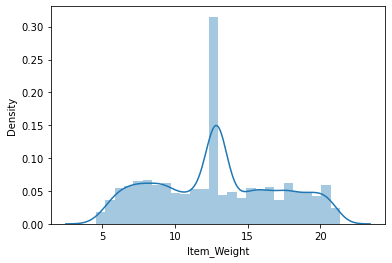

In [22]:
sns.distplot(df['Item_Weight'])

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

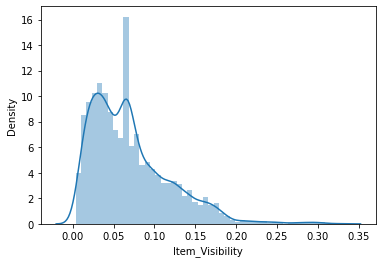

In [23]:
sns.distplot(df['Item_Visibility'])

skewness is present.


In [24]:
#Removing skewness
df['Item_Visibility']=np.log(1+df['Item_Visibility'])

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

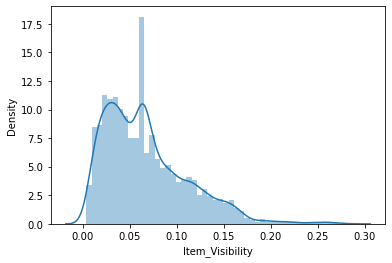

In [25]:
sns.distplot(df['Item_Visibility'])

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

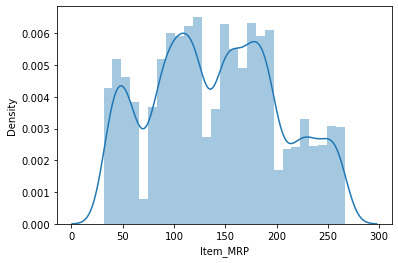

In [26]:
sns.distplot(df['Item_MRP'])

the price of item range in between 30 to 260.

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

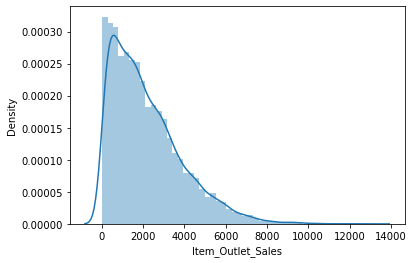

In [27]:
sns.distplot(df['Item_Outlet_Sales'])

The sales range in between 0 to 14000 , and skewness is present

In [28]:
#Removing skewness
df['Item_Outlet_Sales']=np.log(1+df['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

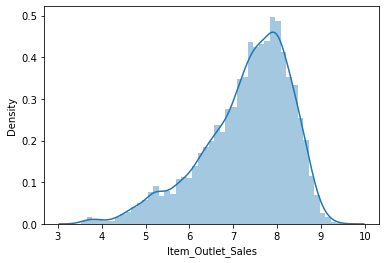

In [29]:
sns.distplot(df['Item_Outlet_Sales'])

Now the plot is almost equal to normal distribution.

FOR CATEGORICAL COLUMNS

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

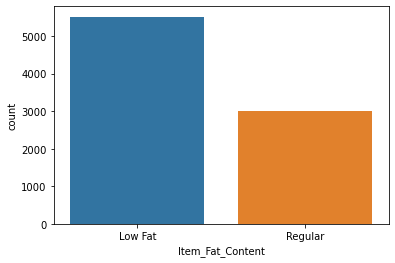

In [30]:
sns.countplot(df['Item_Fat_Content'])

Blue color is showing Low Fat item with approx 5500 and Yellow color is showing Regular item with approx 3000.

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

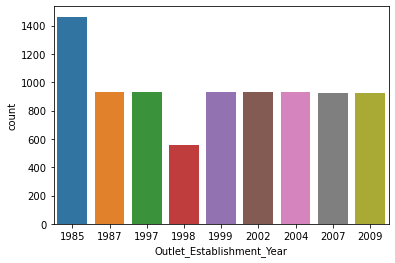

In [31]:
sns.countplot(df['Outlet_Establishment_Year'])

here only one oulets have more number of count showing in blue color established in 1985 , other than that outlets are in equal distribution.

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

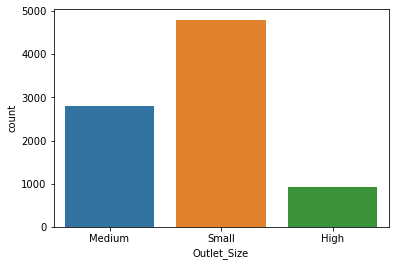

In [32]:
sns.countplot(df['Outlet_Size'])

most of the outlets are small showing in yellow color.

Medium outlets are ranging less than 3000 showing in blue color.

High outlets are ranging approx 1000 showing in green color.


<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

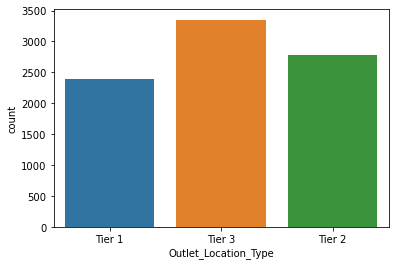

In [33]:
sns.countplot(df['Outlet_Location_Type'])

There is not much difference in the locations of the outlets.

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

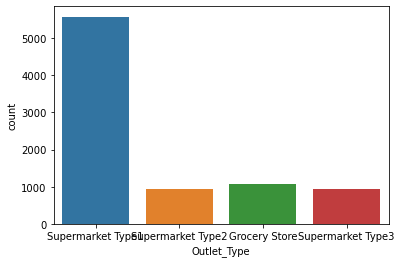

In [34]:
sns.countplot(df['Outlet_Type'])

we can see most of the outlets are supermarket type .

CORRELATION MATRIX

In [35]:
cor=df.corr()
cor

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.017807,0.024756,-0.008301,0.008059
Item_Visibility,-0.017807,1.000000,-0.004858,-0.076053,-0.198589
Item_MRP,0.024756,-0.004858,1.000000,0.005020,0.509886
Outlet_Establishment_Year,-0.008301,-0.076053,0.005020,1.000000,0.077032
Item_Outlet_Sales,0.008059,-0.198589,0.509886,0.077032,1.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0, 0.5, 'Item_Weight'),
  Text(0, 1.5, 'Item_Visibility'),
  Text(0, 2.5, 'Item_MRP'),
  Text(0, 3.5, 'Outlet_Establishment_Year'),
  Text(0, 4.5, 'Item_Outlet_Sales')])

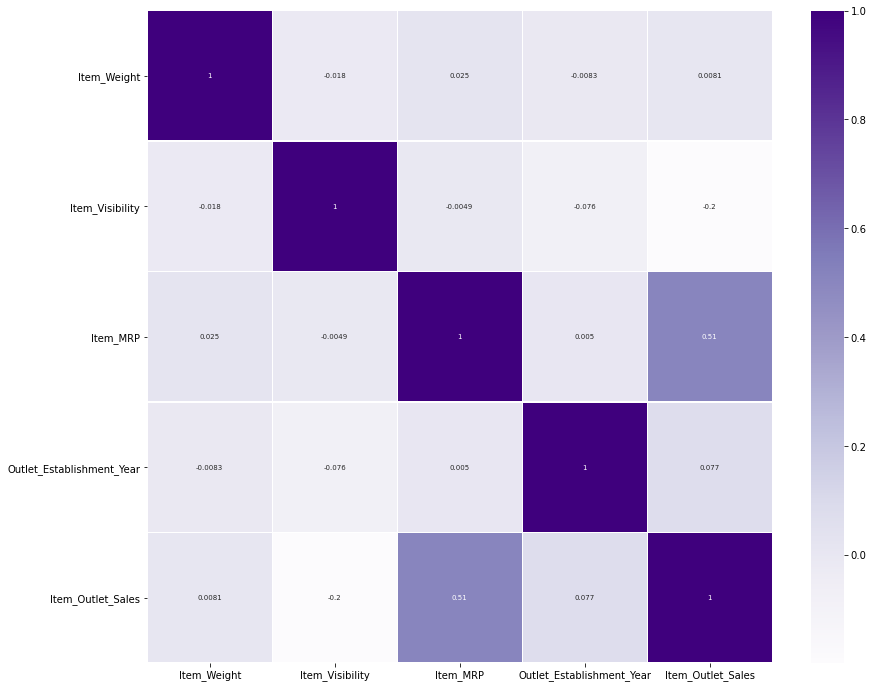

In [36]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="Purples", annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0)

Dark shade is indicating positive correlation and light shade is indicating negative correlation.

Item_MRP is positively correlated with Item_Outlet_Sales.

Item_Visibility is negatively correlated with Item_Outlet_Sales.



LABEL ENCODING

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [39]:
le=LabelEncoder()
df['Item_Identifier']=le.fit_transform(df['Item_Identifier'])
cat_col=['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']

for col in cat_col:
    df[col]=le.fit_transform(df[col])

In [40]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.015920,4,249.8092,9,1999,1,0,1,8.225808
1,8,5.92,1,0.019095,14,48.2692,3,2009,1,2,2,6.096776
2,662,17.50,0,0.016621,10,141.6180,9,1999,1,0,1,7.648868
3,1121,19.20,1,0.064037,6,182.0950,0,1998,2,2,0,6.597664
4,1297,8.93,0,0.064037,9,53.8614,1,1987,0,2,1,6.903451


Now all the categorical columns is converted into numeric column.

SPLITTING THE DATASET

In [41]:
x=df.drop(columns=['Outlet_Establishment_Year','Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])
y=df['Item_Outlet_Sales']

TRAIN TEST SPLIT

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.30, random_state=4)

MODEL BUILDING

In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso ,ElasticNet

In [46]:



#for Linear Regression

lr=LinearRegression()
lr.fit(x_train,y_train)
pred_y=lr.predict(x_test)
print('r2 score',r2_score(y_test,pred_y))

print('error')
print('mean absolute error', mean_absolute_error(y_test,pred_y))
print('mean squared error', mean_squared_error(y_test,pred_y))

print('root mean squared error', np.sqrt(mean_squared_error(y_test,pred_y)))

r2 score 0.5350980414457285
error
mean absolute error 0.550358517383255
mean squared error 0.48530168190926665
root mean squared error 0.6966359751758925


In [47]:
lr.coef_

array([-4.51237827e-03,  1.80067298e-02, -2.26740481e+00, -1.48801338e-03,
        8.30687944e-03, -1.53620912e-01, -3.00420589e-01,  6.75908508e-01])

coefficient of the Linear Regression

In [48]:
#For Lasso
from sklearn.linear_model import Lasso

ls=Lasso()

ls.fit(x_train,y_train)
pred_y=ls.predict(x_test)
print('r2 score',r2_score(y_test,pred_y))

print('error')
print('mean absolute error', mean_absolute_error(y_test,pred_y))
print('mean squared error', mean_squared_error(y_test,pred_y))

print('root mean squared error', np.sqrt(mean_squared_error(y_test,pred_y)))


r2 score 0.2476395332478748
error
mean absolute error 0.6654577181935977
mean squared error 0.7853737614964764
root mean squared error 0.8862131580474736


In [49]:
ls.coef_

array([-0.        ,  0.        , -0.        , -0.        ,  0.00805315,
       -0.        ,  0.        ,  0.        ])

coefficient of the Lasso Regression

In [50]:
# for Ridge
from sklearn.linear_model import Ridge

#For Ridge

rd=Ridge()

rd.fit(x_train,y_train)
pred_y=rd.predict(x_test)
print('r2 score',r2_score(y_test,pred_y))

print('error')
print('mean absolute error', mean_absolute_error(y_test,pred_y))
print('mean squared error', mean_squared_error(y_test,pred_y))

print('root mean squared error', np.sqrt(mean_squared_error(y_test,pred_y)))



r2 score 0.5350146030481377
error
mean absolute error 0.5504303928287084
mean squared error 0.4853887815524097
root mean squared error 0.6966984868308598


In [51]:
rd.coef_

array([-4.47443965e-03,  1.72935318e-02, -2.08409776e+00, -1.40659213e-03,
        8.30727788e-03, -1.54252162e-01, -3.01067233e-01,  6.77577156e-01])

coefficient of the Ridge Regression

In [52]:
#For ElasticNet
from sklearn.linear_model import ElasticNet


en=ElasticNet()

en.fit(x_train,y_train)
pred_y=en.predict(x_test)
print('r2 score',r2_score(y_test,pred_y))

print('error')
print('mean absolute error', mean_absolute_error(y_test,pred_y))
print('mean squared error', mean_squared_error(y_test,pred_y))

print('root mean squared error', np.sqrt(mean_squared_error(y_test,pred_y)))


r2 score 0.2478276860634735
error
mean absolute error 0.6652778026810925
mean squared error 0.7851773526059871
root mean squared error 0.8861023375468474


In [53]:
en.coef_

array([-0.        ,  0.        , -0.        , -0.        ,  0.00817915,
       -0.        ,  0.        ,  0.        ])

CHECKING R2 SCORE THROUGH CROSS VALIDATION

In [54]:
# For Linear Regression


score=cross_val_score(lr,x,y,cv=5)
print('cv score',np.mean(score))


cv score 0.5405439138957784


In [55]:
# For Lasso


score=cross_val_score(ls,x,y,cv=5)
print('cv score',np.mean(score))

cv score 0.2592618151206076


In [56]:
# For Ridge


score=cross_val_score(rd,x,y,cv=5)
print('cv score',np.mean(score))

cv score 0.5405076037816359


In [57]:

#For ElasticNet

score=cross_val_score(en,x,y,cv=5)
print('cv score',np.mean(score))

cv score 0.2594454773392182


HYPER PARAMETER TUNING

In [58]:
from sklearn.model_selection import GridSearchCV

model =LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(model,parameters, cv=None)
grid.fit(x_train, y_train)
print ("r2 score : ", grid.best_score_)
print("Residual sum of squares: %.2f"
              % np.mean((grid.predict(x_test) - y_test) ** 2))
print('mean absolute error', mean_absolute_error(y_test,pred_y))
print('mean squared error', mean_squared_error(y_test,pred_y))

print('root mean squared error', np.sqrt(mean_squared_error(y_test,pred_y)))


r2 score :  0.5424772793672054
Residual sum of squares: 0.49
mean absolute error 0.6652778026810925
mean squared error 0.7851773526059871
root mean squared error 0.8861023375468474


SAVING MODEL

In [60]:
import joblib
joblib.dump(model,'big_mart_sales.csv')

['big_mart_sales.csv']